In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r"D:\jupyter_project\Time_Series\timeSeries\data\daily-total-female-births-CA.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['date'])
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [11]:
df2 = df.set_index('date')

In [15]:
# Let's extract the average number of birth in each month
y = df2['births'].resample('MS').mean()
y.head()

date
1959-01-01    39.129032
1959-02-01    41.000000
1959-03-01    39.290323
1959-04-01    39.833333
1959-05-01    38.967742
Freq: MS, Name: births, dtype: float64

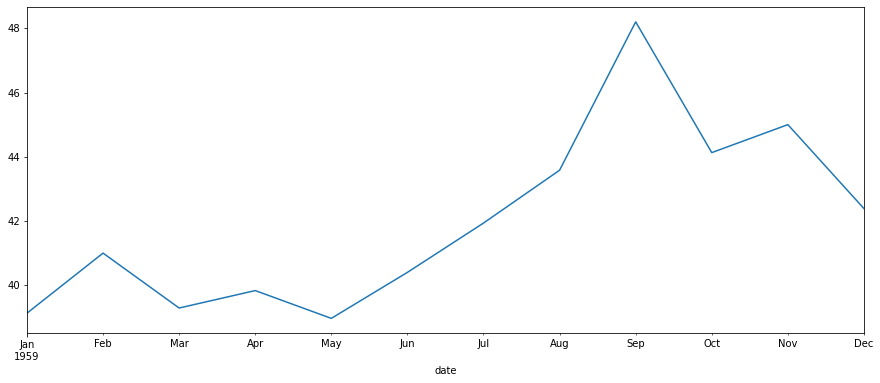

In [17]:
y.plot(figsize=(15, 6))
plt.show()

In [22]:
###  Testing for Stationarity: When a time series is stationary, it can be easier to model
###  adfuller is a function used to check Stationarity in dataset.

from statsmodels.tsa.stattools import adfuller
test_fuller = adfuller(df2["births"])

In [23]:
"""
Hypothesis Test
Ho: It is non stationary.
H1: It is stationary.
"""

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic",'p-value',"#Lags Used","No. of observations"]
    for value,label in zip(result, labels):
        print(label,':',str(value))
        
    if result[1] <= 0.05:
        print("Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak Evidence against null hypothesis(H1), time series has a unit root, indicating it is non-stationary ")

In [24]:
adfuller_test(df2["births"])

ADF Test Statistic : -4.808291253559764
p-value : 5.2434129901498554e-05
#Lags Used : 6
No. of observations : 358
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


In [27]:
df2.births

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

In [28]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df2.births, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2474.496, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3776.976, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2656.891, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3407.164, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2471.358, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2472.653, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2471.853, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2474.564, Time=0.50 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 2.448 seconds
                               SARIMAX Results                                
Dep. Variable:               

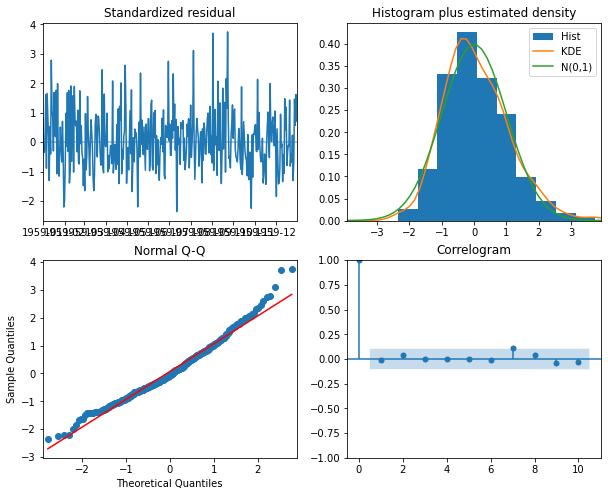

In [29]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

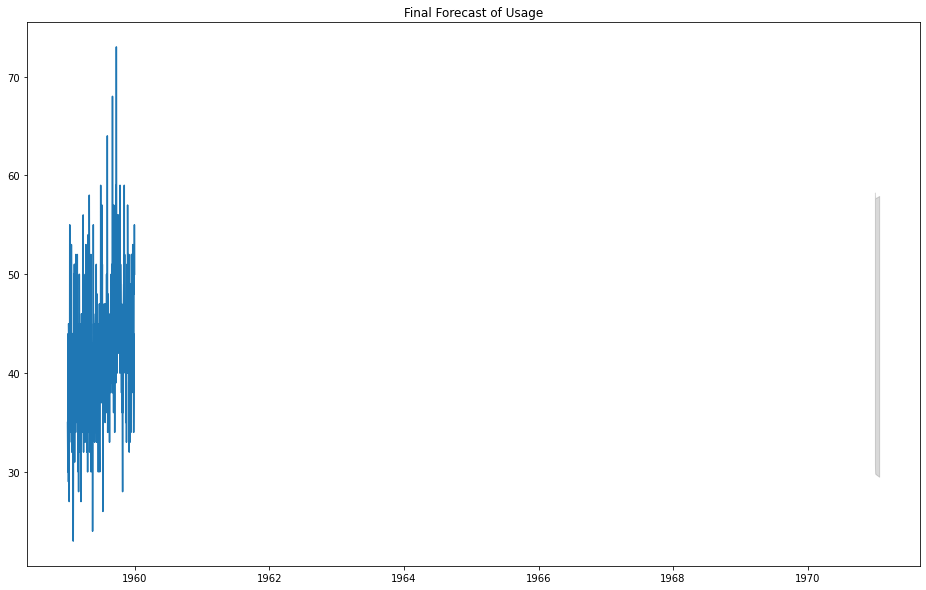

In [31]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df2.births), len(df2.births)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df2.births)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

In [32]:
import pmdarima as pm
smodel = pm.auto_arima(df2.births, start_p=1, start_q=1,test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2662.069, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2530.513, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2660.366, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2653.014, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2483.445, Time=0.79 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2492.040, Time=1.07 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2484.558, Time=0.93 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2484.848, Time=1.22 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2484.730, Time=0.60 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=2486.114, Time=2.05 sec
 ARIMA(1,0,0)(2,1,0)[12]             : 

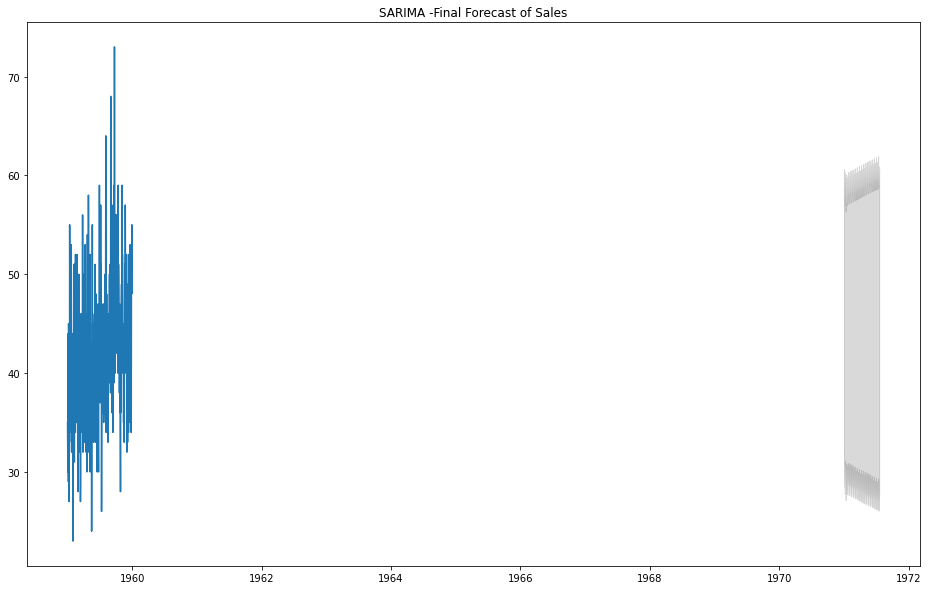

In [34]:
# Forecast
n_periods = 200
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df2.births), len(df2.births)+n_periods)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df2.births)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA -Final Forecast of Sales")
plt.show()